In [ ]:
LLM_type = 'gemini' #'gemini', 'moondream', 'moondream_finetuned'

url =  'https://www.youtube.com/watch?v=Xithigfg7dA'
ext = "webm"
res = "480"

# https://www.youtube.com/watch?v=CwXOrWvPBPk # shrek
# https://www.youtube.com/watch?v=2EBAVoN8L_U # pretty woman
# https://www.youtube.com/watch?v=pBk4NYhWNMM # barbie
# https://www.youtube.com/watch?v=Xithigfg7dA # deadpool

### 1. Key sentence

In [2]:
sentence = ''


#### Generate key sentence based on the transcript

In [3]:
%load_ext autoreload
%autoreload 2
from youtube_transcript_api import YouTubeTranscriptApi
from thumbnail_generator import video_id, PromptGenerator, Prompts

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')

yt_str = "https://www.youtube.com/watch?v="
stop_words = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())

id = video_id(url)
print(id)
transcript_list = YouTubeTranscriptApi.get_transcript(id)
transcript = ' '.join([section['text'] for section in transcript_list])

transcript = word_tokenize(transcript)
transcript = [w.lower() for w in transcript if w not in stop_words and w in words]
transcript = ' '.join(transcript)
print(transcript)

if sentence == '':
  try:
    if LLM_type == 'moondream':
      sentence = PromptGenerator.moondream(transcript, frame_amt, combine_emb, prompt=Prompts.SumText)
    elif LLM_type == 'moondream_finetuned':
      sentence = PromptGenerator.moondream(transcript, frame_amt, combine_emb,
                                           ft_path = "/content/drive/MyDrive/moondream_ft_moon_mean_eps10_bs8_1frame",
                                           prompt=Prompts.SumText)
    elif LLM_type == 'gemini':
      sentence = PromptGenerator.gemini(transcript, prompt=Prompts.SumText)
    else:
      raise Exception('wrong LLM_type')
  except Exception as e:
    print(e)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Xithigfg7dA
i love wade wilson fight right cancer liver prostate brain i live without i told make better fighter give men dream make superhero promise right i right someone else please make super suit green animated one thing never place sense humor see pop spice oh come leave alone less angry hey yeah i want shoot baby back i want think mother like shot i want know straight wait hold sex mother wait may wondering red suit well bad ca see bleed guy got right idea wore brown pants needs express rage give damn right i i no matter many break like old lady pants like dick mouth oh hard look like testicle teeth look like freddy face topographical map utah exactly came stay i touching tonight going give going give x going give i give look like avocado sex older avocado thank


In [10]:
print(sentence)

A cancer-stricken Wade Wilson, driven by a desire to become a superhero, expresses his chaotic, humorous, and violent thoughts and plans.



### 2. Rating the frames based on the key sentence

In [5]:
from thumbnail_generator import FrameRating
from yt_dlp import YoutubeDL
import os
import numpy as np

In [7]:
opts = {
  'format': f'bestvideo[ext={ext}][height={res}]',
  'geo_bypass': True,
  'geo_bypass_country': 'US',
  'paths': {'home': ''},
  'outtmpl': '%(id)s.%(ext)s',
  'quiet': True,
}

frame_rating = [0]
# with YoutubeDL(opts) as ydl: ydl.download(yt_str + id)

res = FrameRating.clip(sentence, f"{id}.{ext}", 1000)
print(res)
# while max(frame_rating) < 80:
#   try:
#     if LLM_type == 'moondream':
#       [frame_rating, frames] = FrameRating.moondream(sentence, f"{id}.{ext}")
#     elif LLM_type == 'moondream_finetuned':
#       [frame_rating, frames] = FrameRating.moondream(sentence, f"{id}.{ext}",
#                                         ft_path = "/content/drive/MyDrive/moondream_ft_moon_mean_eps10_bs8_1frame")
#     elif LLM_type == 'gemini':
#       time.sleep(60)
#       [frame_rating, frames] = FrameRating.gemini(sentence, f"{id}.{ext}")
#     else:
#       print('wrong LLM_type')
#   except Exception as e:
#     print(e)
#     break
#   frame_rating = [int(x.strip()) for x in frame_rating]

# os.remove(f"{id}.{ext}")

[[(0.30344951152801514, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F790>), (0.3024820387363434, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F670>), (0.3019670844078064, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F850>), (0.30109888315200806, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476582DD20>), (0.300873726606369, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F760>), (0.30068209767341614, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F2B0>), (0.2999197840690613, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476582F910>), (0.2998700439929962, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476582D870>), (0.2987990081310272, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578EEF0>), (0.29876360297203064, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F580>), (0.2979791760444641, <PIL.Image.Image image mode=RGB size=854x480 at 0x2476578F490>), (0.29663708806037903, <PIL.Image.Image image mode

In [15]:
best_frame = res[0][0][1]

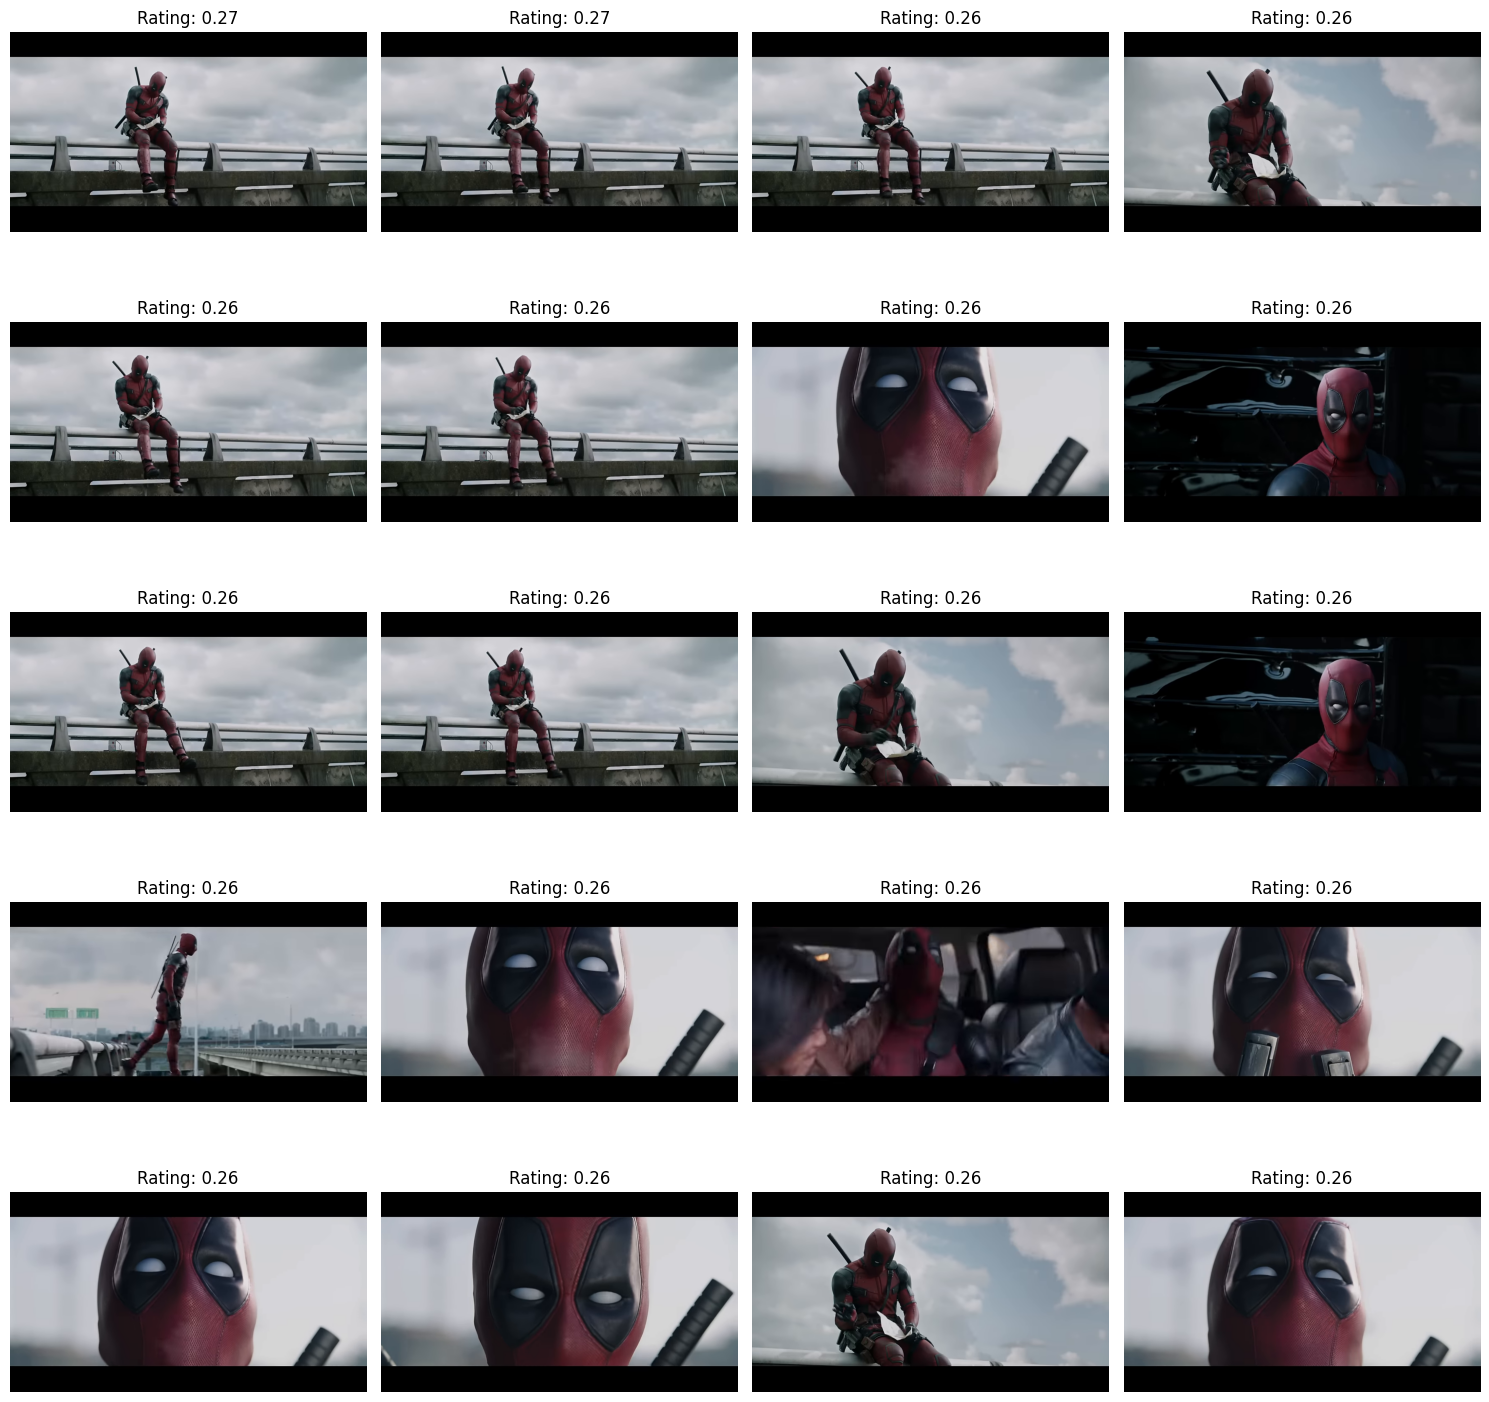

In [8]:
from matplotlib import pyplot as plt

top_k = 20

num_cols = 4
num_rows = (top_k + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i in range(top_k):
    try:
        rating, image = res[4][i]
        axes[i].imshow(image)
        axes[i].set_title(f'Rating: {rating:.2f}')
        axes[i].axis('off')
    except: pass

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

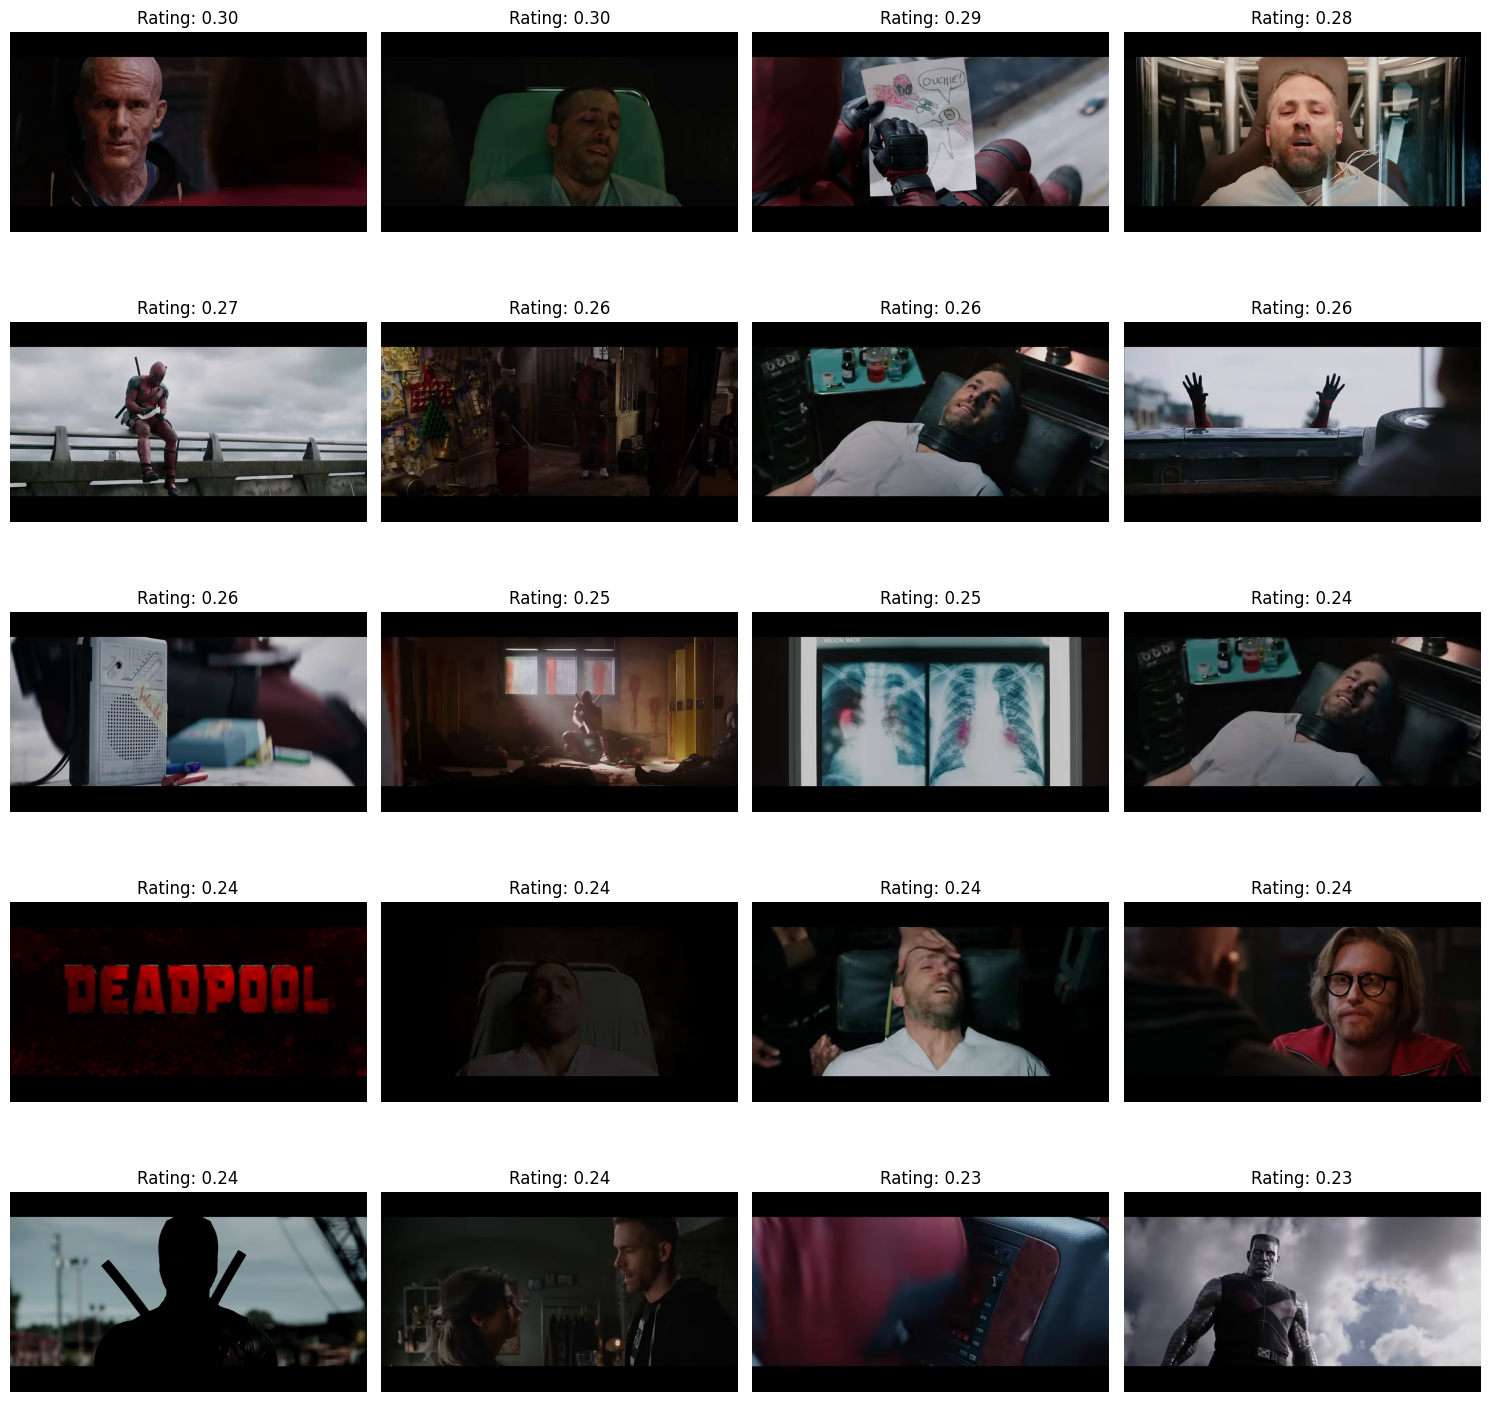

In [9]:
from matplotlib import pyplot as plt

top_k = 20

num_cols = 4
num_rows = (top_k + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i in range(top_k):
    rating, image = res[i][0]
    axes[i].imshow(image)
    axes[i].set_title(f'Rating: {rating:.2f}')
    axes[i].axis('off')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 3. Cartoonish the best image

At the end, the user can decide whether they want to use the original best image (a frame of the video) or a cartoonish version of it.

In [ ]:
own_frame = []

#### a. Does the frame fit?

Yes -> move on to b

No -> upload your own picture

a. Describe the best image via Gemini

In [ ]:
%pip freeze > requirements.txt
%load_ext autoreload
%autoreload 2
from PIL import Image
frame_path = "deadpool_image.jpg"
own_frame = Image.open(frame_path)
own_frame

b. In what style should the artificial image be generated?

Examples: Photorealistic, Cyberpunk, Pixel Art, Anime, Painting, Surrealism, Minimalist, Gothic

In [ ]:
style = "painting"

c. Describe the best/own frame

In [ ]:
# LLM_type = 'gemini'
LLM_type = 'moondream'
# LLM_type = 'moondream_finetuned'

In [ ]:
from thumbnail_generator import Describe

In [ ]:
best_image = own_frame

try:
  if LLM_type == 'moondream':
    describe_best_image = Describe().moondream(best_image, style)
  elif LLM_type == 'moondream_finetuned':
    describe_best_image = Describe().moondream(best_image,
                                             style,
                                             ft_path = "/content/drive/MyDrive/moondream_ft_moon_mean_eps10_bs8_1frame")
  elif LLM_type == 'gemini':
    describe_best_image = Describe().gemini(best_image, style)
  else:
    describe_best_image = 'wrong LLM_type'
except Exception as e:
  print(e)

describe_best_image

d. Generate image via Stable Diffusion

In [2]:
from src.thumbnail_generator import Diffuser
gen_res = (1344,768)
diff = Diffuser()
#lora = "sdxl/1344x768-200-1600-500-cats-no"
#diff.pipe.load_lora_weights(f"loras/{lora}.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
diff.generate(describe_best_image, batch_size=4, width=gen_res[0], height=gen_res[1], seed=42)
display(diff.get_grid())